In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
%cd drive/MyDrive/genrecog/
%pip install speechbrain

In [3]:
from genrecog.preprocess.preprocessor import Preprocessor
from genrecog.nnet.CNN import VanillaConv2d
from genrecog.tools.trainer import CNNFbankTrainer
import torch
from torch.utils.data import TensorDataset, DataLoader 
import datetime

torch.manual_seed(0)

In [4]:
# Load dataset

train_preprcessor = Preprocessor('dataset/npz_files/train.npz')
test_preprcessor = Preprocessor('dataset/npz_files/test.npz')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
X, y = train_preprcessor.as_shuffled_torch()
X_test, y_test = test_preprcessor.as_shuffled_torch()

dataset = TensorDataset(X.to(device), y.to(device))
validation_dataset, train_dataset = torch.utils.data.random_split(dataset, (400, 3200))
test_dataset = TensorDataset(X_test.to(device), y_test.to(device))

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=400)
validation_dataloader = DataLoader(validation_dataset, shuffle=True, batch_size=400)
test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=400)

In [6]:
lr = 0.001
model = VanillaConv2d().to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model

VanillaConv2d(
  (batch_norm): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (input_conv): Sequential(
    (0): Conv2d(1, 128, kernel_size=(32, 32), stride=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=8, stride=8, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=10624, out_features=10, bias=True)
)

In [7]:
trainer = CNNFbankTrainer(
    model=model, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=100)
trainer.train()

============================== EPOCH 1 =================================
Training accuracy 16.56
Training loss 5.3638
Validation accuracy 9.00
Validation loss 63.5431
============================== EPOCH 2 =================================
Training accuracy 18.94
Training loss 3.6897
Validation accuracy 15.25
Validation loss 11.1025
============================== EPOCH 3 =================================
Training accuracy 24.37
Training loss 2.9503
Validation accuracy 19.00
Validation loss 3.9733
============================== EPOCH 4 =================================
Training accuracy 25.25
Training loss 2.3433
Validation accuracy 28.75
Validation loss 2.1168
============================== EPOCH 5 =================================
Training accuracy 26.53
Training loss 2.0616
Validation accuracy 23.50
Validation loss 2.1001
============================== EPOCH 6 =================================
Training accuracy 29.94
Training loss 1.9468
Validation accuracy 27.00
Validation loss 1.96

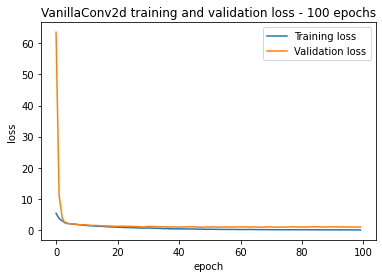

In [8]:
trainer.plot_loss("VanillaConv2d training and validation loss - 100 epochs")

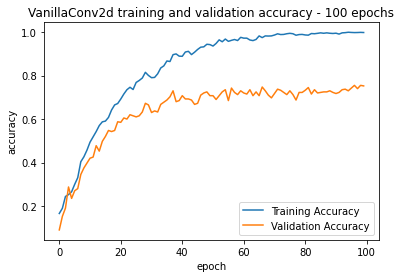

In [9]:
trainer.plot_accuracies("VanillaConv2d training and validation accuracy - 100 epochs")

In [10]:
trainer.eval(test_dataloader)

(tensor([9, 3, 0, 0, 8, 8, 0, 1, 4, 6, 8, 4, 0, 3, 2, 4, 1, 9, 0, 4, 7, 4, 6, 1,
         9, 9, 0, 3, 3, 6, 0, 5, 4, 9, 7, 4, 7, 0, 7, 4, 9, 2, 7, 2, 5, 7, 1, 8,
         5, 3, 7, 2, 4, 1, 8, 6, 2, 4, 9, 7, 4, 3, 0, 9, 1, 5, 6, 8, 2, 5, 5, 8,
         9, 0, 6, 4, 6, 8, 5, 3, 2, 7, 6, 3, 0, 2, 5, 7, 0, 2, 6, 8, 1, 4, 0, 5,
         2, 1, 5, 2, 5, 0, 3, 0, 1, 4, 5, 7, 2, 2, 2, 4, 3, 5, 5, 7, 1, 9, 2, 7,
         0, 7, 7, 8, 9, 8, 9, 8, 3, 0, 5, 5, 7, 6, 1, 9, 2, 7, 2, 1, 0, 4, 7, 0,
         8, 1, 6, 4, 7, 3, 4, 0, 1, 4, 8, 9, 1, 2, 9, 9, 0, 1, 8, 4, 5, 2, 5, 5,
         3, 9, 8, 2, 3, 0, 3, 1, 6, 0, 7, 7, 7, 6, 6, 3, 6, 9, 3, 2, 0, 0, 0, 5,
         3, 0, 7, 4, 1, 5, 5, 3, 9, 5, 8, 7, 2, 5, 8, 7, 3, 2, 4, 7, 6, 0, 9, 6,
         1, 5, 0, 6, 3, 0, 8, 5, 7, 9, 9, 6, 7, 6, 0, 8, 1, 5, 9, 9, 2, 8, 5, 7,
         6, 3, 3, 9, 1, 3, 0, 7, 5, 7, 1, 6, 9, 9, 6, 2, 4, 7, 4, 6, 9, 9, 9, 7,
         4, 8, 4, 9, 7, 0, 2, 0, 1, 5, 2, 6, 4, 1, 0, 5, 0, 8, 3, 9, 6, 6, 2, 4,
         1, 9, 1, 9, 7, 3, 9

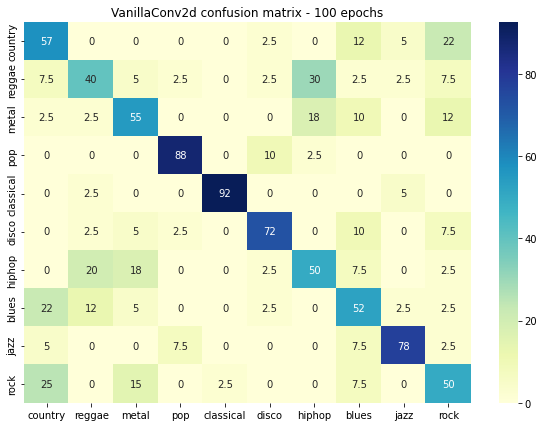

In [11]:
trainer.plot_confusion_matrix(test_dataloader, 'VanillaConv2d confusion matrix - 100 epochs')

In [12]:
trainer.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.48      0.57      0.52        40
      reggae       0.50      0.40      0.44        40
       metal       0.54      0.55      0.54        40
         pop       0.88      0.88      0.88        40
   classical       0.97      0.93      0.95        40
       disco       0.78      0.72      0.75        40
      hiphop       0.50      0.50      0.50        40
       blues       0.48      0.53      0.50        40
        jazz       0.84      0.78      0.81        40
        rock       0.47      0.50      0.48        40

    accuracy                           0.64       400
   macro avg       0.64      0.64      0.64       400
weighted avg       0.64      0.64      0.64       400



In [13]:
lr = 0.001
model_2 = VanillaConv2d().to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=lr)
model_2

VanillaConv2d(
  (batch_norm): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (input_conv): Sequential(
    (0): Conv2d(1, 128, kernel_size=(32, 32), stride=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=8, stride=8, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=10624, out_features=10, bias=True)
)

In [14]:
trainer_2 = CNNFbankTrainer(
    model=model_2, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=60)
trainer_2.train()

============================== EPOCH 1 =================================
Training accuracy 14.41
Training loss 6.3813
Validation accuracy 10.25
Validation loss 62.6786
============================== EPOCH 2 =================================
Training accuracy 16.81
Training loss 3.8328
Validation accuracy 14.25
Validation loss 10.6125
============================== EPOCH 3 =================================
Training accuracy 24.19
Training loss 3.1592
Validation accuracy 12.75
Validation loss 4.0935
============================== EPOCH 4 =================================
Training accuracy 23.44
Training loss 2.2947
Validation accuracy 21.75
Validation loss 2.2203
============================== EPOCH 5 =================================
Training accuracy 31.47
Training loss 1.9697
Validation accuracy 30.25
Validation loss 1.9424
============================== EPOCH 6 =================================
Training accuracy 36.37
Training loss 1.8246
Validation accuracy 32.50
Validation loss 1.8

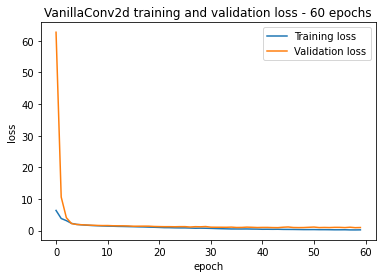

In [15]:
trainer_2.plot_loss("VanillaConv2d training and validation loss - 60 epochs")

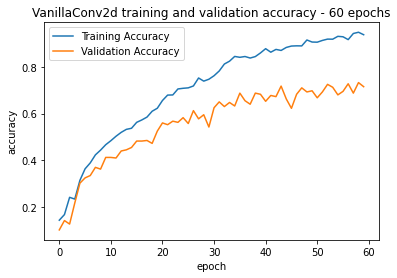

In [16]:
trainer_2.plot_accuracies("VanillaConv2d training and validation accuracy - 60 epochs")

In [17]:
trainer_2.eval(test_dataloader)

(tensor([0, 9, 4, 4, 2, 2, 9, 9, 8, 8, 2, 8, 2, 4, 8, 6, 5, 8, 4, 0, 2, 2, 2, 4,
         8, 2, 4, 5, 0, 2, 8, 6, 5, 2, 0, 8, 1, 1, 5, 4, 5, 3, 0, 3, 0, 2, 4, 0,
         5, 7, 2, 0, 2, 2, 5, 1, 8, 6, 4, 6, 0, 3, 9, 5, 0, 7, 5, 0, 4, 0, 4, 9,
         2, 1, 2, 1, 6, 6, 5, 2, 3, 5, 9, 1, 5, 2, 4, 1, 5, 3, 5, 0, 2, 8, 9, 0,
         4, 9, 3, 9, 3, 9, 5, 2, 0, 8, 6, 5, 8, 5, 4, 2, 5, 9, 2, 4, 5, 2, 9, 2,
         1, 2, 0, 5, 2, 2, 7, 4, 7, 0, 1, 4, 0, 8, 5, 2, 8, 0, 5, 9, 4, 6, 4, 7,
         6, 9, 0, 8, 8, 2, 8, 2, 3, 9, 6, 0, 1, 2, 2, 5, 4, 8, 8, 2, 0, 3, 8, 7,
         5, 8, 5, 9, 0, 4, 8, 2, 8, 6, 2, 9, 6, 4, 5, 5, 2, 0, 8, 0, 8, 8, 4, 2,
         5, 1, 6, 2, 9, 2, 0, 0, 0, 3, 2, 2, 6, 5, 2, 0, 4, 9, 8, 7, 8, 4, 6, 9,
         5, 5, 0, 2, 2, 6, 4, 8, 8, 5, 6, 0, 8, 8, 0, 8, 2, 2, 0, 2, 1, 4, 9, 7,
         4, 6, 1, 9, 1, 4, 0, 4, 1, 3, 2, 7, 6, 3, 8, 0, 0, 0, 0, 0, 9, 7, 7, 1,
         0, 9, 0, 5, 9, 9, 9, 2, 4, 0, 2, 2, 0, 3, 4, 6, 2, 8, 9, 6, 9, 5, 5, 6,
         0, 2, 5, 2, 9, 1, 9

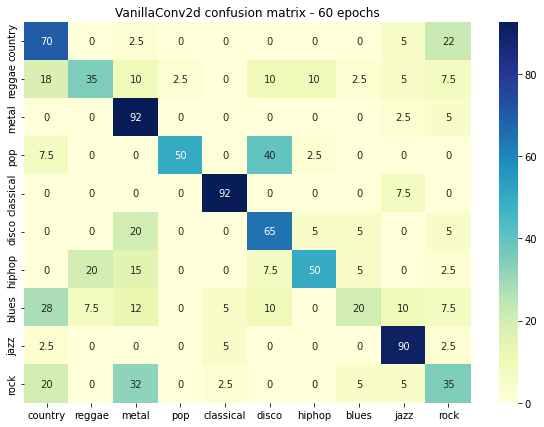

In [18]:
trainer_2.plot_confusion_matrix(test_dataloader, 'VanillaConv2d confusion matrix - 60 epochs')

In [19]:
trainer_2.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.48      0.70      0.57        40
      reggae       0.56      0.35      0.43        40
       metal       0.50      0.93      0.65        40
         pop       0.95      0.50      0.66        40
   classical       0.88      0.93      0.90        40
       disco       0.49      0.65      0.56        40
      hiphop       0.74      0.50      0.60        40
       blues       0.53      0.20      0.29        40
        jazz       0.72      0.90      0.80        40
        rock       0.40      0.35      0.37        40

    accuracy                           0.60       400
   macro avg       0.63      0.60      0.58       400
weighted avg       0.63      0.60      0.58       400

